In [2]:
#!curl -O https://github.com/mshunshin/SegNetCMR/tree/master/Data/Test/Images/Sunnybrook_Part3
#!curl -O https://github.com/mshunshin/SegNetCMR/tree/master/Data/Test/Images/Sunnybrook_Part3
#!tar -xf images.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  483k    0  483k    0     0   546k      0 --:--:-- --:--:-- --:--:--  545k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  483k    0  483k    0     0   708k      0 --:--:-- --:--:-- --:--:--  707k
100  483k    0  483k    0     0   708k      0 --:--:-- --:--:-- --:--:--  707k


In [2]:
%load_ext tensorboard
%tensorboard --logdir 'C:/Users/userDesktop/python-20201213T085545Z-001/python/MRI Class/SEG/SegNetCMR/Data/Train/oxford_segmentation.h5'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13492), started 0:01:01 ago. (Use '!kill 13492' to kill it.)

In [1]:
#!tar -xf Images/Sunnybrook_Part3
#!tar -xf Images/Sunnybrook_Part3

tar: Error opening archive: Failed to open 'Images/Sunnybrook_Part3'
tar: Error opening archive: Failed to open 'Images/Sunnybrook_Part3'


In [1]:
import os

import tensorflow as tf



In [1]:
import random
from tensorflow.keras import layers
import numpy as np
from tensorflow import keras
from PIL import ImageOps
import PIL
from tensorflow.keras.preprocessing.image import load_img
from IPython.display import Image, display


## Prepare paths of input images and target segmentation masks


##
DATA_NAME = 'Data'
TRAIN_SOURCE = "Sunnybrook_Part1"
TEST_SOURCE = 'Sunnybrook_Part1la'
RUN_NAME = "SELU_Run03"
OUTPUT_NAME = 'Output'
CHECKPOINT_FN = 'model.ckpt'

WORKING_DIR = os.getcwd()

TRAIN_DATA_DIR = os.path.join(WORKING_DIR,TRAIN_SOURCE)
TEST_DATA_DIR = os.path.join(WORKING_DIR,TEST_SOURCE)

ROOT_LOG_DIR = os.path.join(WORKING_DIR, OUTPUT_NAME)
LOG_DIR = os.path.join(ROOT_LOG_DIR, RUN_NAME)
CHECKPOINT_FL = os.path.join(LOG_DIR, CHECKPOINT_FN)

TRAIN_WRITER_DIR = os.path.join(LOG_DIR, TRAIN_SOURCE)
TEST_WRITER_DIR = os.path.join(LOG_DIR, TEST_SOURCE)



##
#input_dir = "TRAIN_WRITER_DIR"
#target_dir = "TEST_WRITER_DIR"
##
##

input_dir = "Sunnybrook_Part1"
target_dir = "Sunnybrook_Part1la"
#img_size = (32, 32)
img_size = (256, 256)
num_classes = 3

batch_size = 6

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)


print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)



ModuleNotFoundError: No module named 'tensorflow'

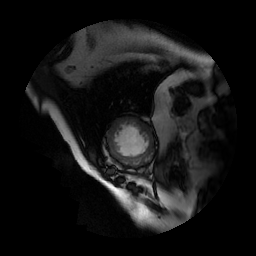

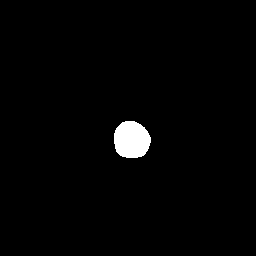

<PIL.Image.Image image mode=RGB size=256x256 at 0x26E28654820>


In [3]:
# Display input image #7
display(Image(filename=input_img_paths[10]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[10]))
display(img)
print(img)

In [5]:
#target_img_paths = sorted(os.path.join(target_dir, fname)


for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

## What does one input image and corresponding segmentation mask look like?"""



Sunnybrook_Part1\SC-HF-I-01-IM-0001-0048.dcm.png | Sunnybrook_Part1la\SC-HF-I-01-IM-0001-0048.dcm.png
Sunnybrook_Part1\SC-HF-I-01-IM-0001-0059.dcm.png | Sunnybrook_Part1la\SC-HF-I-01-IM-0001-0059.dcm.png
Sunnybrook_Part1\SC-HF-I-01-IM-0001-0068.dcm.png | Sunnybrook_Part1la\SC-HF-I-01-IM-0001-0068.dcm.png
Sunnybrook_Part1\SC-HF-I-01-IM-0001-0079.dcm.png | Sunnybrook_Part1la\SC-HF-I-01-IM-0001-0079.dcm.png
Sunnybrook_Part1\SC-HF-I-01-IM-0001-0088.dcm.png | Sunnybrook_Part1la\SC-HF-I-01-IM-0001-0088.dcm.png
Sunnybrook_Part1\SC-HF-I-01-IM-0001-0099.dcm.png | Sunnybrook_Part1la\SC-HF-I-01-IM-0001-0099.dcm.png
Sunnybrook_Part1\SC-HF-I-01-IM-0001-0108.dcm.png | Sunnybrook_Part1la\SC-HF-I-01-IM-0001-0108.dcm.png
Sunnybrook_Part1\SC-HF-I-01-IM-0001-0119.dcm.png | Sunnybrook_Part1la\SC-HF-I-01-IM-0001-0119.dcm.png
Sunnybrook_Part1\SC-HF-I-01-IM-0001-0128.dcm.png | Sunnybrook_Part1la\SC-HF-I-01-IM-0001-0128.dcm.png
Sunnybrook_Part1\SC-HF-I-01-IM-0001-0139.dcm.png | Sunnybrook_Part1la\SC-HF-I-01-I

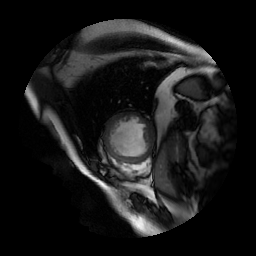

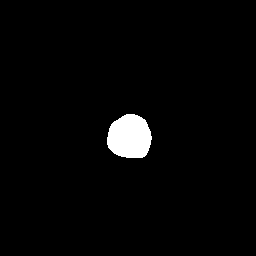

In [6]:

# Display input image #7
display(Image(filename=input_img_paths[9]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[9]))
display(img)

"""## Prepare `Sequence` class to load & vectorize batches of data"""


class OxfordPets(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i: i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i: i + self.batch_size]
        
        batch_target_img_paths = batch_target_img_paths
        x = np.zeros((self.batch_size,) +
                     self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size,
                           color_mode="grayscale")
            y[j] = np.expand_dims(img, 2) > 0
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            #y[j] -= 1
            
        return x, y.astype(np.int)




In [7]:
"""## Perpare U-Net Xception-style model"""


def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(
        num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()



Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [8]:
"""## Set aside a validation split"""
import random

# Split our img paths into a training and a validation set
val_samples = 70
random.Random(120).shuffle(input_img_paths)
random.Random(120).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:] 

# Instantiate data Sequences for each split
train_gen = OxfordPets(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = OxfordPets(batch_size, img_size,
                     val_input_img_paths, val_target_img_paths)


In [9]:
x, y = val_gen.__getitem__(10)

In [10]:
np.max(y)

1

In [10]:

"""## Train the model"""

# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "oxford_segmentation.h5", save_best_only=True)
]

# Train the model, doing validation at the end of each epoch.
#epochs = 15
epochs = 15
model.fit(train_gen, epochs=epochs,
          validation_data=val_gen, callbacks=callbacks)

Epoch 1/15
76/76 [==============================] - 202s 3s/step - loss: 0.3531 - val_loss: 0.2678
Epoch 2/15
76/76 [==============================] - 206s 3s/step - loss: 0.2601 - val_loss: 0.2679
Epoch 3/15
76/76 [==============================] - 200s 3s/step - loss: 0.2601 - val_loss: 0.2679
Epoch 4/15
76/76 [==============================] - 213s 3s/step - loss: 0.2601 - val_loss: 0.2679
Epoch 5/15
76/76 [==============================] - 230s 3s/step - loss: 0.2601 - val_loss: 0.2679
Epoch 6/15
76/76 [==============================] - 207s 3s/step - loss: 0.2601 - val_loss: 0.2679
Epoch 7/15
76/76 [==============================] - 205s 3s/step - loss: 0.2601 - val_loss: 0.2679
Epoch 8/15
76/76 [==============================] - 210s 3s/step - loss: 0.2601 - val_loss: 0.2679
Epoch 9/15
76/76 [==============================] - 209s 3s/step - loss: 0.2601 - val_loss: 0.2679
Epoch 10/15
76/76 [==============================] - 219s 3s/step - loss: 0.2601 - val_loss: 0.2679
Epoch 11/

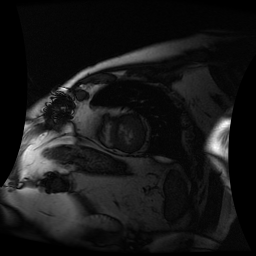

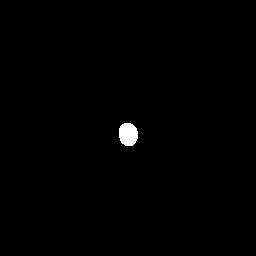

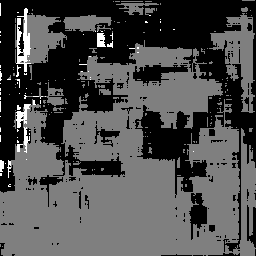

In [11]:
"""## Visualize predictions"""
# Generate predictions for all images in the validation set

val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)
val_preds = model.predict(val_gen)


def display_mask(i):
    """Quick utility to display a model's prediction."""
    mask = np.argmax(val_preds[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    display(img)


# Display results for validation image #10
i = 10

# Display input image
display(Image(filename=val_input_img_paths[i]))

# Display ground-truth target mask
img = PIL.ImageOps.autocontrast(load_img(val_target_img_paths[i]))
display(img)

# Display mask predicted by our model
display_mask(i)  # Note that the model only sees inputs at 150x150.